Voici le notebook sur lequel nous allons expliquer la démarche derrière l'édition d'images. 
En reprenant les notations du document -- http://eul.ink/complex-analysis/Poisson%20Image%20Editing/ -- nous cherchons à résoudre:
$$\begin{align*}
\Delta \psi &= \Delta \phi \; sur \; D\\
\psi_{|\partial{D}} &= \phi_{|\partial{D}}
\end{align*}
$$
Discrétisons les fonctions proposées. On crée une grille avec $N = m*n$ points pour répresenter $D \in \mathbf{R}^2 $.
Soient $\{x_i, x_j, i \in [1,m], j \in [1,n]\}$ décrivant cette grille, avec les pas $ h_x = x_{i+1} - x_i $, et  $ h_y = x_{j+1} - x_j $. Notons $h = max(h_x,h_y)$
Puis on pose:
$$
u = 
\begin{pmatrix}
\psi_{1,1}\\
\psi_{2,1}\\
\vdots\\
\psi_{m,1}\\
\psi_{1,2}\\
\psi_{2,2}\\
\vdots\\
\psi_{m,2}\\
\vdots\\
\psi_{1,n}\\
\vdots\\
\psi_{m,n}\\
\end{pmatrix} \in \mathbf{R}^{N}
$$
u est le vecteur que l'on cherche à déterminer
On pose de la même manière:
$$t = 
\begin{pmatrix}
\phi_{1,1}\\
\phi_{2,1}\\
\vdots\\
\phi_{m,1}\\
\phi_{1,2}\\
\phi_{2,2}\\
\vdots\\
\phi_{m,2}\\
\vdots\\
\phi_{1,n}\\
\vdots\\
\phi_{m,n}\\
\end{pmatrix} \in \mathbf{R}^{N}
$$
Enfin, on explicite l'opérateur Laplacien: 
Lorsque la discrétisation est assez fine, pour une fonction deux fois différentiable u, 
$$\begin{align}
\Delta \psi(x_i,x_j) &= \frac{\partial^2 \psi}{\partial x^2}(x_i,x_j)+\frac{\partial^2 \psi}{\partial y^2}(x_i,x_j)
\end{align}
$$
Or, pour une fonction f quelconque, on a les approximations suivantes

$$\begin{align*}
f(x_{i+1}) &= f(x_{i}) + f'(x_{i})h + f''(x_i)\frac{h^2}{2} + O(h^4) \\
f(x_{i-1}) &= f(x_{i}) - f'(x_{i})h + f''(x_i)\frac{h^2}{2} + O(h^4) \\
\end{align*}
$$
Ie: 
$$\begin{align*}
f(x_{i+1}) + f(x_{i-1}) &= 2f(x_{i}) +  f''(x_i)h^2 + O(h^2) \\
\frac{f(x_{i+1}) + f(x_{i-1}) - 2f(x_{i}) }{h^2} &= f''(x_i) + O(h^2)\\
\end{align*}
$$
Puis enfin, en 2D, pour la fonction Psi par exemple: 
$$\begin{align*}
\frac{\psi(x_{i+1,j}) + \psi(x_{i-1,j})+\psi(x_{i,j+1}) + \psi(x_{i,j-1}) - 4\psi(x_{i,j})}{h^2} &= \Delta \psi(x_{i,j}) + O(h^2)\\
\end{align*}
$$
On va donc résoudre, en pratique 
$$\begin{align*}
A \mathbf{u} &= A \mathbf{t} \; sur \; D\\
\mathbf{u}_{|\partial{D}} &= \mathbf{t}_{|\partial{D}}
\end{align*}
$$
A est l'opérateur laplacien: 
$$ 
A = 
\begin{pmatrix}
-4 & 1 & & & &  1 & & & & & & & & &  & & & & & \\
1 & -4 & 1  & & &  & 1 & & & &  & & & &  &  & & & & \\
 &\ddots & \ddots & & &  &  &\ddots & & &  &  & & &  &  & & & & \\
 & & 1 & -4 & &  &  & & 1  & &  &  & & &  &  & & & & \\
1&  & & & &  -4 & 1 & & & & 1 & & & &  & & & & & \\
 & 1 & & & &  1 & -4 & 1 & & &  & 1 & & &  & & & & & \\
 &  & \ddots & & &   & \ddots & \ddots & & &  &  &\ddots & &  & & & & & \\
 &  &  & 1 & &   &  & 1 & -4& &  &  & & 1 &  & & & & & \\
  &  &  &  & &   &  &  & \ddots& &  &  & &  &  & & & & & \\
   &  &  &  & &   &  &  & & \ddots &  &  & &  &  & & & & & \\
\end{pmatrix} \in \mathbf{R}^{N*N}
$$
Notons 
$$ 
D = 
\begin{pmatrix}
-4 & 1 & & & &\\
1 & -4 & 1 & & &\\
 & \ddots & \ddots & \ddots& &\\
  & & \ddots & \ddots&  1 & \\
    & & & 1 &  -4 & \\
\end{pmatrix} \in \mathbf{R}^{m*m}
$$
Et notons
$$ 
I = 
\begin{pmatrix}
1 & & & &\\
& 1 &  & &\\
 & & \ddots &\\
 & & &  1\\
\end{pmatrix} \in \mathbf{R}^{m*m}
$$
Alors A est une matrice par blocs, composée par les blocs $D$ et $I$: 
$$ 
A = \begin{pmatrix}
D & I & & & &\\
I &D& I & & &\\
 & \ddots & \ddots & \ddots& &\\
  & & \ddots & \ddots&  I & \\
    & & & I &  D & \\
\end{pmatrix} \in \mathbf{R}^{N*N}
$$
Il faut maintenant prendre en compte la contrainte sur les bords
$$\psi_{|\partial{D}} = \phi_{|\partial{D}} $$
Pour tout indice d'ordre lexicographique $ k = i*m + j $ désignant un point $u_k = \psi_{x_i,x_j} $ tel que $u_k \in \partial{D}$, on va imposer la contrainte:
$$ \begin{align*}
\forall l \;!= \;j,\; a_{i*m+l} &= 0 \\
a_{k} = 1
\end{align*}
$$
Ceci empêche la matrice d'être symétrique puisqu'elle ressemble alors à:
$$A = \begin{pmatrix}
I &   & & & &\\
I' &D'& I' & & &\\
 & \ddots & \ddots & \ddots& &\\
  & & \ddots & \ddots&  I' & \\
    & & &  &  I & \\
\end{pmatrix} \in \mathbf{R}^{N*N}
$$
Si elle n'est pas inversible, nous pourrons toujours ajouter les termes qui manquent pour la rendre symétrique, et éventuellement ajouter un facteur à la matrice identité pour imposer la contrainte

TO DO:
* make mask function
* make laplacian function
*


from PIL import image
import numpy as np

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def convert_image_2Dgrey_not_3D(url, img):
   """Takes an image url (in 3D because RGB values), and returns the corresponding 2D grey image"""
   if not img:
      img = Image.open("images/objects-final.jpeg")
   im2 = np.array(img.getdata())
   im2[:] = im2.mean(axis = 1).reshape((-1,1))
   im2 = im2.reshape((img.height, img.width, 3))
   plt.imshow(im2)
   return im2.mean(axis =  2)
#make_image_2D_not_3D("image/objects.jpeg")

def convert_image_to_array3D(img:Image.Image):
   return np.array(img.getdata()).reshape((img.height,img.width,3))

def show_image(img):
   plt.imshow(np.array(img.getdata()).reshape((img.height,img.width,3)))


In [4]:
def lapA(m:int ,n:int):
   """Create laplacian operator matrix, without the boundary condition
   Args:
   m : int - height in pixels of D domain
   n : int - width in pixels of D domain"""
   D = np.eye(m) * -4
   D[0:m-1,1:m]+= np.eye(m-1)
   D[1:m,0:m-1]+= np.eye(m-1)
   A = np.zeros(shape = (n*m,n*m) )
   for k in range(n):
      A[k*m: k*m+m, k*m: k*m+m] = D
   return A





In [15]:
def make_mask(source,target,source_x,source_y):
   if(type(source) == Image.Image): #convert to array
      source_arr = convert_image_2Dgrey_not_3D(None,source)
      assert(type(source_arr) == np.ndarray)
      assert(source_arr.ndim == 2)
   else:
      source_arr = source
   if(type(target) != np.ndarray): #convert to array
      target_arr = convert_image_2Dgrey_not_3D(None,target)
      assert(type(target_arr) == np.ndarray)
      assert(target_arr.ndim == 2)
   else:
      target_arr = target


   #The mask m will have the same shape as target
   #The mask m has a rectangular of 1s, inside a boundary of 0s
   m = np.zeros(shape = target_arr.shape)
   m[source_y] = 0
   m[source_y+source_arr.shape[0]] = 0
   m[:,source_x] = 0
   m[: source_x+source_arr.shape[1]] = 0

   return m



In [13]:
def lapAfinal(m,n,source, mask):
   A = lapA(m,n)
   mask_ = mask.copy()
   A[mask_==0] = 0
   A[mask_==0, mask_==0] = 1
   return A

""" print(im3[:10,:10])
lapAfinal(4,4,im3[:4,:4]) """
   

' print(im3[:10,:10])\nlapAfinal(4,4,im3[:4,:4]) '

In [14]:
#b has (DeltaChi on D, Phi on boundary)
def make_b(m,n,source, target, m1,m2):

   chi =  convert_image_2Dgrey_not_3D(url = None, img = source)
   print(chi.shape)
   print("building A")
   A = lapAfinal(m,n,source, mask)
   print("A built")
   print(f"{A.shape=}")
   print(f"{chi.shape=}")
   b = A @ chi
   #Boundary condition b = target on the boundary
   b[m == 0] = target[m==0]
   print(b)
   return b
   

target size -> (900, 500)
source size -> (900, 500)


TypeError: 'int' object is not subscriptable

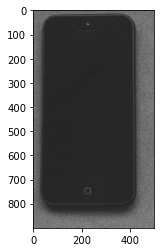

In [22]:

def solve():
   source = Image.open("images/objects.jpeg")
   source_y,source_x = 1400,1600
   source_width, source_height = 500,900
   source = source.crop((source_x,source_y,source_x+source_width, source_y+source_height))
   #show_image(source)
   
   #make target rectangle of the same size as source
   target = Image.open("images/objects-final.jpeg")
   target_y,target_x =  1400,1080
   target = target.crop((target_x,target_y, target_x+source_width, target_y+source_height))

   target.show()
   source.show()

   
   print(f"target size -> {target.size[1],target.size[0]}")
   print(f"source size -> {source.size[1], source.size[0]}")

   source = convert_image_2Dgrey_not_3D(None, source)
   target = convert_image_2Dgrey_not_3D(None, target)
   m,n = source.size[1], source.size[0]
   m = make_mask(source,target,source_x,source_y)
   b = make_b(m,n,source,target,m)
   


solve()  

In [ ]:
1+1

2